In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
from platform import python_version 
print(python_version())

3.8.8


In [3]:
import PV_ICE
PV_ICE.__version__


'v0.2.0+441.g9d903de.dirty'

In [4]:
MATERIALS = ['glass', 'aluminium_frames']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [5]:
test2 = True # IRENA with weibull params, PV _ICE with t50 t90
test3 = True

# 1. Run PV ICE and IRENA files with standard baselines

In [6]:
sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [7]:
sim1.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [8]:
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim1.scenario['IRENA'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#modified module
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='r_IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e) 

#modified materials
#glass
matinput_glass_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_glass_improvedRecycle.csv')
matbaseline_e_glass = os.path.join(baselinesfolder,'baseline_material_energy_glass.csv')
sim1.scenario['r_IRENA'].addMaterial('glass', massmatfile=matinput_glass_m_improvedRecycle, energymatfile=matbaseline_e_glass)
#silicon
matinput_silicon_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silicon_improvedRecycle.csv')
matbaseline_e_si = os.path.join(baselinesfolder,'baseline_material_energy_silicon.csv')
sim1.scenario['r_IRENA'].addMaterial('silicon', massmatfile=matinput_silicon_m_improvedRecycle, energymatfile=matbaseline_e_si)
#silver
matinput_silver_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silver_improvedRecycle.csv')
matbaseline_e_ag = os.path.join(baselinesfolder,'baseline_material_energy_silver.csv')
sim1.scenario['r_IRENA'].addMaterial('silver', massmatfile=matinput_silver_m_improvedRecycle, energymatfile=matbaseline_e_ag)
#aluminium frames
matinput_Al_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_aluminium_frames_improvedRecycle.csv')
matbaseline_e_al = os.path.join(baselinesfolder,'baseline_material_energy_aluminium_frames.csv')
sim1.scenario['r_IRENA'].addMaterial('aluminium_frames', massmatfile=matinput_Al_m_improvedRecycle, energymatfile=matbaseline_e_al)

#standard materials
baselineMats=['copper', 'encapsulant', 'backsheet']
for mats in range (0, len(baselineMats)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+baselineMats[mats]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+baselineMats[mats]+'.csv')
    sim1.scenario['r_IRENA'].addMaterial(baselineMats[mats], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [9]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  IRENA
IRENA glass : Data trimmed for Energy, years now encompass  2000  to  2100
IRENA aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
IRENA aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100


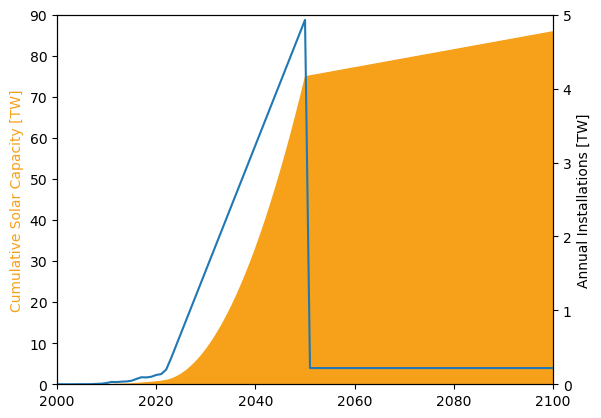

In [10]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

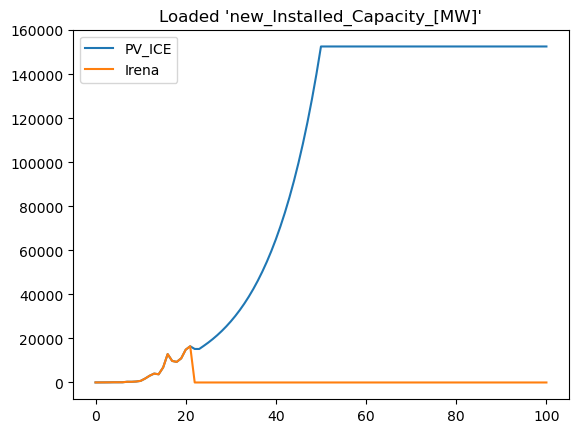

In [11]:
#Loaded new installed capacity, will be modified in next cell...
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]'], label='PV_ICE')
plt.plot(sim1.scenario['IRENA'].dataIn_m['new_Installed_Capacity_[MW]'], label='Irena')
plt.title("Loaded 'new_Installed_Capacity_[MW]'")
plt.legend()

In [12]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)

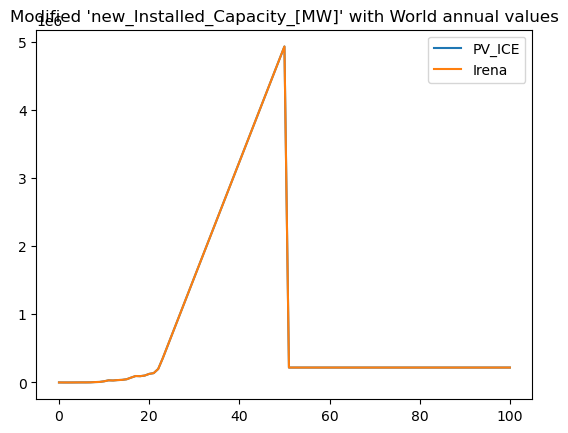

In [13]:
# RE-plot after modifying scenarios
plt.plot(sim1.scenario['PV_ICE'].dataIn_m['new_Installed_Capacity_[MW]'], label='PV_ICE')
plt.plot(sim1.scenario['IRENA'].dataIn_m['new_Installed_Capacity_[MW]'], label='Irena')
plt.title("Modified 'new_Installed_Capacity_[MW]' with World annual values")
plt.legend()

In [14]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [15]:
if test3: 
    nameplatedeglimit = 0.3
else:
    nameplatedeglimit = None

if test2:
    sim1.calculateMassFlow(scenarios='PV_ICE', nameplatedeglimit=nameplatedeglimit)
    print("\n\nRunning T50 for PV_ICE and weibull Params for Irena\n")
    sim1.calculateMassFlow(scenarios='IRENA', weibullInputParams=IRENAregloss, nameplatedeglimit=nameplatedeglimit )
else:
    sim1.calculateMassFlow(nameplatedeglimit=nameplatedeglimit) #weibullInputParams=IRENAregloss

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames


Running T50 for PV_ICE and weibull Params for Irena

>>>> Calculating Material Flows <<<<

Working on Scenario:  IRENA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  IRENA  =  66131643.96398518  tonnes.


In [16]:
if test3 and test2:
    customname='_debugIrena_test2_test3'
elif test2:
    customname='_debugirena_Test2'
else:
    customname='_debugirena'

sim1.saveSimulation(customname=customname)

:) Saved Input and Output Dataframes


In [17]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots

In [18]:
sim1.scenario['IRENA'].dataOut_m

,Area,Cumulative_Active_Area,EOL_BadStatus,EOL_Landfill0,EOL_PATHS,EOL_PG,Effective_Capacity_[W],Landfill_0_ProjLife,MerchantTail_Area,MerchantTail_[W],...,Yearly_Sum_Area_PathsBad,Yearly_Sum_Area_PathsGood,Yearly_Sum_Area_atEOL,Yearly_Sum_Power_EOLby_Degradation,Yearly_Sum_Power_EOLby_Failure,Yearly_Sum_Power_EOLby_ProjectLifetime,Yearly_Sum_Power_PathsBad,Yearly_Sum_Power_PathsGood,Yearly_Sum_Power_atEOL,irradiance_stc
0,6.025849e+06,6.025849e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.086690e+08,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1000.0
1,2.090566e+06,8.116416e+06,3.744808e-03,2.122058e-02,3.744808e-03,0.000000e+00,1.086921e+09,0.000000e+00,0.0,0.0,...,2.496539e-02,0.000000e+00,2.496539e-02,0,3.325227e+00,0.000000e+00,3.325227e+00,0.000000e+00,3.325227e+00,1000.0
2,2.507415e+06,1.062383e+07,1.911485e-01,1.083175e+00,1.911485e-01,0.000000e+00,1.422842e+09,0.000000e+00,0.0,0.0,...,1.274324e+00,0.000000e+00,1.274324e+00,0,1.684828e+02,0.000000e+00,1.684828e+02,0.000000e+00,1.684828e+02,1000.0
3,3.813595e+06,1.443741e+07,1.820100e+00,1.031390e+01,1.820100e+00,0.000000e+00,1.940140e+09,0.000000e+00,0.0,0.0,...,1.213400e+01,0.000000e+00,1.213400e+01,0,1.593284e+03,0.000000e+00,1.593284e+03,0.000000e+00,1.593284e+03,1000.0
4,7.782451e+06,2.221980e+07,8.751281e+00,4.959059e+01,8.751281e+00,0.000000e+00,3.012530e+09,0.000000e+00,0.0,0.0,...,5.834187e+01,0.000000e+00,5.834187e+01,0,7.611069e+03,0.000000e+00,7.611069e+03,0.000000e+00,7.611069e+03,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9.969091e+08,2.787579e+10,7.409956e+08,2.492273e+08,7.476818e+08,6.686189e+06,5.419209e+12,2.228730e+06,0.0,0.0,...,9.879942e+08,6.686189e+06,9.969091e+08,0,1.691810e+11,1.366112e+09,1.691810e+11,1.024584e+09,1.705471e+11,1000.0
97,9.969091e+08,2.787579e+10,7.409956e+08,2.492273e+08,7.476818e+08,6.686189e+06,5.419209e+12,2.228730e+06,0.0,0.0,...,9.879942e+08,6.686189e+06,9.969091e+08,0,1.691810e+11,1.366112e+09,1.691810e+11,1.024584e+09,1.705471e+11,1000.0
98,9.969091e+08,2.787579e+10,7.409956e+08,2.492273e+08,7.476818e+08,6.686189e+06,5.419209e+12,2.228730e+06,0.0,0.0,...,9.879942e+08,6.686189e+06,9.969091e+08,0,1.691810e+11,1.366112e+09,1.691810e+11,1.024584e+09,1.705471e+11,1000.0
99,9.969091e+08,2.787579e+10,7.409956e+08,2.492273e+08,7.476818e+08,6.686189e+06,5.419209e+12,2.228730e+06,0.0,0.0,...,9.879942e+08,6.686189e+06,9.969091e+08,0,1.691810e+11,1.366112e+09,1.691810e+11,1.024584e+09,1.705471e+11,1000.0


Text(0.5, 1.0, 'IRENA')

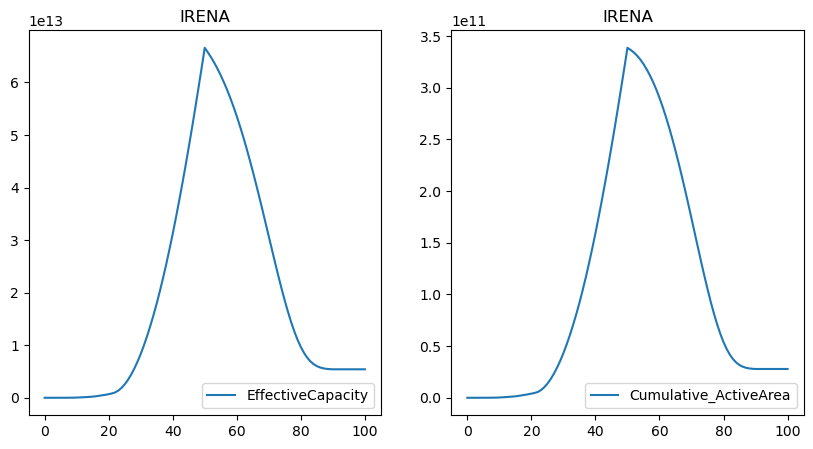

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2,1)
plt.plot(sim1.scenario['IRENA'].dataOut_m['Effective_Capacity_[W]'],label='EffectiveCapacity')
plt.legend()
#plt.ylim([0, 2.5e11])
#plt.ylim([0, 2.0e10])
plt.title('IRENA')

plt.subplot(1,2,2)
plt.plot(sim1.scenario['IRENA'].dataOut_m['Cumulative_Active_Area'], label='Cumulative_ActiveArea')
#plt.ylim([0, 2.0e10])
plt.legend()
plt.title('IRENA')

#plt.plot(sim1.scenario['IRENA'].dataOut_m['Effective_Capacity_[W]'])
#plt.plot(sim1.scenario['IRENA'].dataOut_m['Cumulative_Active_Area'])

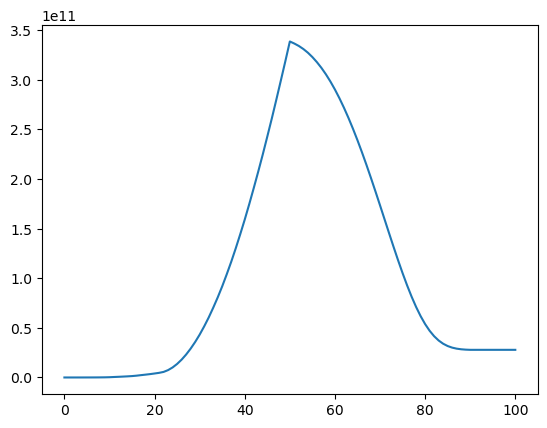

In [20]:
plt.plot(sim1.scenario['IRENA'].dataOut_m['Cumulative_Active_Area'])

(0.0, 90.26425956655)

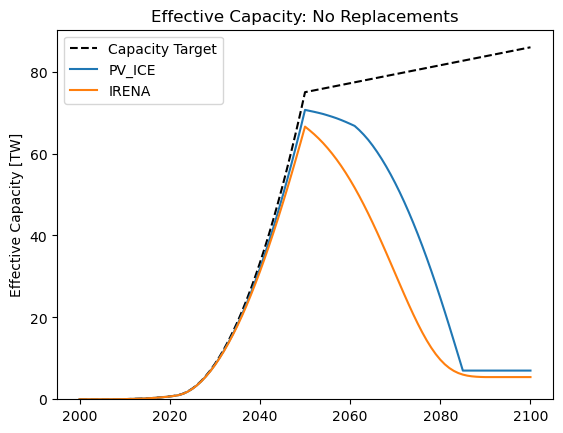

In [21]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim1.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [22]:
ii_yearly.filter(like='Decommisioned')

,DecommisionedCapacity_sim1_PV_ICE_[MW],DecommisionedCapacity_sim1_IRENA_[MW]
year,,
2000,1.136868e-13,1.136868e-13
2001,6.065023e+00,6.065021e+00
2002,1.421732e+01,1.421710e+01
2003,2.489341e+01,2.489000e+01
2004,3.947168e+01,3.944867e+01
...,...,...
2096,7.807981e+07,7.966951e+07
2097,7.829913e+07,7.988883e+07
2098,7.851845e+07,8.010815e+07


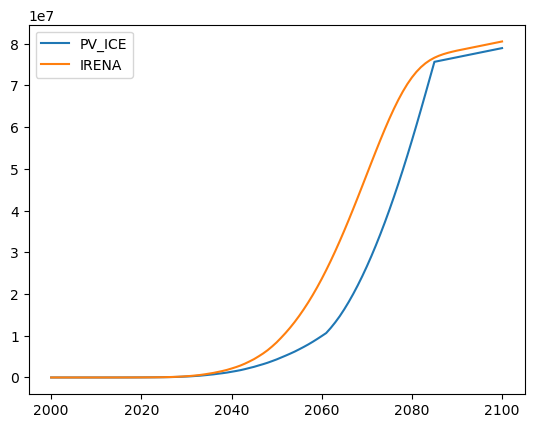

In [23]:
# MW. #Sil are this already cumulative? I think this was one of the bugs Garvin found we haven't fixed?
plt.plot(ii_yearly.filter(like='Decommisioned'))
plt.legend(sim1.scenario.keys())

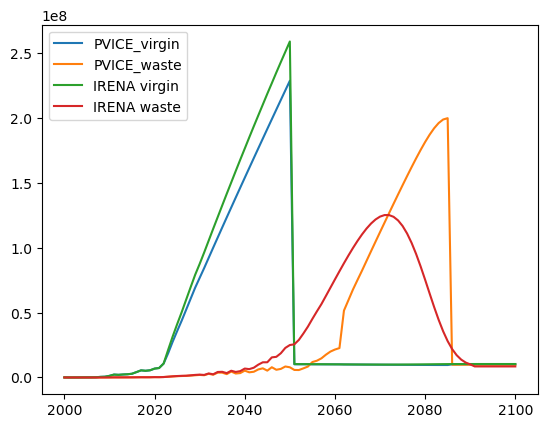

In [24]:
#plt.plot(ii_yearly['WasteAll_Module_sim1_r_IRENA_[Tonnes]'], label='r_waste')
#plt.plot(ii_yearly['VirginStock_Module_sim1_r_IRENA_[Tonnes]'], label='r_virgin')

plt.plot(ii_yearly['VirginStock_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_waste')

plt.plot(ii_yearly['VirginStock_Module_sim1_IRENA_[Tonnes]'], label='IRENA virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='IRENA waste')

plt.legend()

In [25]:
# WHere does aggregateREsults "'WasteAll_Module_sim1_IRENA_[Tonnes]" comes from?
# --> Grabs each materials df matdataOut_m column 'mat_Total_Landfilled'; then aggregates into module

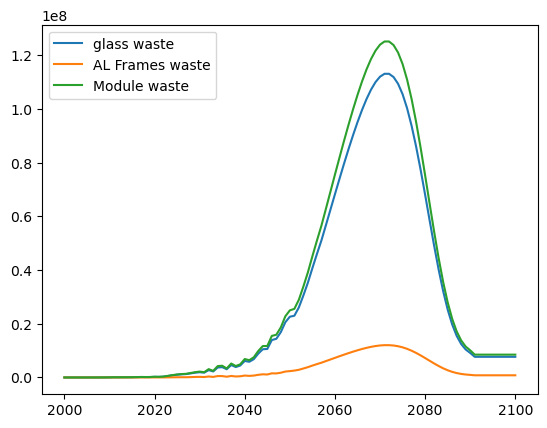

In [26]:
plt.plot(ii_yearly['WasteAll_glass_sim1_IRENA_[Tonnes]'], label='glass waste')
plt.plot(ii_yearly['WasteAll_aluminium_frames_sim1_IRENA_[Tonnes]'], label='AL Frames waste')
plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='Module waste')
plt.legend()
# Math looks correctly (still cumulative but correct)

Text(0, 0.5, 'GRAMS')

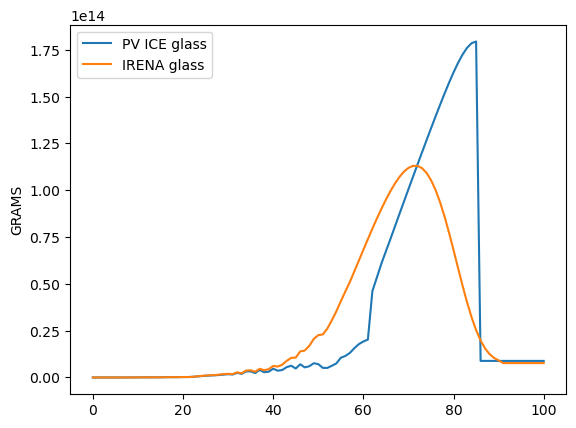

In [27]:
plt.plot(sim1.scenario['PV_ICE'].material['glass'].matdataOut_m['mat_Total_Landfilled'], label='PV ICE glass')
plt.plot(sim1.scenario['IRENA'].material['glass'].matdataOut_m['mat_Total_Landfilled'], label='IRENA glass')
plt.legend()
plt.ylabel('GRAMS')

In [28]:
# mat_Total_Landfilled

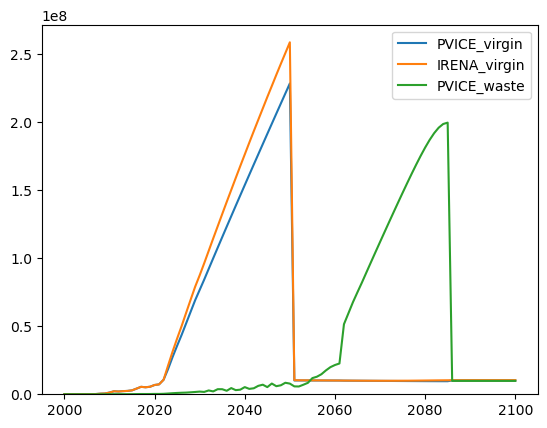

In [29]:
plt.plot(ii_yearly['VirginStock_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.plot(ii_yearly['VirginStock_Module_sim1_IRENA_[Tonnes]'], label='IRENA_virgin')
plt.plot(ii_yearly['WasteAll_Module_sim1_PV_ICE_[Tonnes]'], label='PVICE_waste')
#plt.plot(ii_yearly['WasteAll_Module_sim1_IRENA_[Tonnes]'], label='IRENA_waste')

plt.ylim(0,)
plt.legend()

In [30]:
sim1.scenario['PV_ICE'].dataOut_m.columns

Index(['Area', 'Cumulative_Active_Area', 'EOL_BadStatus', 'EOL_Landfill0',
       'EOL_PATHS', 'EOL_PG', 'Effective_Capacity_[W]', 'Landfill_0_ProjLife',
       'MerchantTail_Area', 'MerchantTail_[W]', 'ModuleTotal_MFG', 'P2_stored',
       'P3_reMFG', 'P4_recycled', 'PB1_landfill', 'PB2_stored', 'PB3_reMFG',
       'PB3_reMFG_unyield', 'PB3_reMFG_yield', 'PB4_recycled', 'PG1_landfill',
       'PG2_stored', 'PG3_reMFG', 'PG3_reMFG_unyield', 'PG3_reMFG_yield',
       'PG4_recycled', 'Power_Degraded_[W]', 'Repaired_Area', 'Repaired_[W]',
       'Resold_Area', 'Resold_[W]', 'WeibullParams',
       'Yearly_Sum_Area_EOLby_Degradation', 'Yearly_Sum_Area_EOLby_Failure',
       'Yearly_Sum_Area_EOLby_ProjectLifetime', 'Yearly_Sum_Area_PathsBad',
       'Yearly_Sum_Area_PathsGood', 'Yearly_Sum_Area_atEOL',
       'Yearly_Sum_Power_EOLby_Degradation', 'Yearly_Sum_Power_EOLby_Failure',
       'Yearly_Sum_Power_EOLby_ProjectLifetime', 'Yearly_Sum_Power_PathsBad',
       'Yearly_Sum_Power_PathsGood

(0.0, 18929780214.93509)

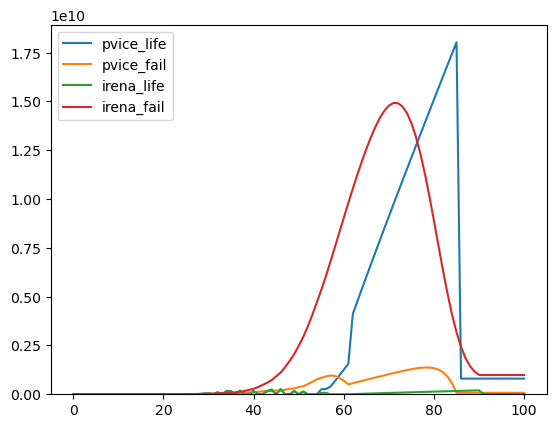

In [31]:
plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime'], label='pvice_life')
plt.plot(sim1.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='pvice_fail')

plt.plot(sim1.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime'], label='irena_life')
plt.plot(sim1.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='irena_fail')

#plt.plot(sim1.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_irena_fail')
#plt.plot(sim1.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_irena_life')

plt.legend()
plt.ylim(0,)

Text(0.5, 1.0, 'PVICE')

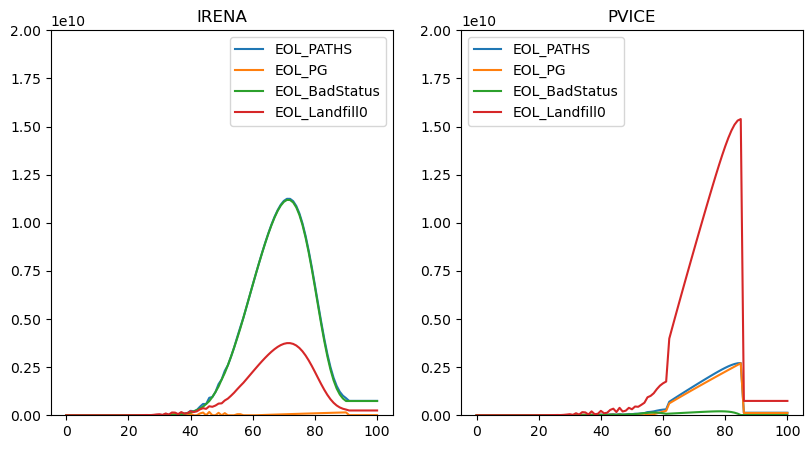

In [32]:
L0 = sim1.scenario['PV_ICE'].dataOut_m['EOL_Landfill0']
EOLpaths = sim1.scenario['PV_ICE'].dataOut_m['EOL_PATHS']
PG = sim1.scenario['PV_ICE'].dataOut_m['EOL_PG']
PB = sim1.scenario['PV_ICE'].dataOut_m['EOL_BadStatus']
PVICE_EOLpaths = pd.concat([EOLpaths,PG,PB,L0], axis=1)

L0 = sim1.scenario['IRENA'].dataOut_m['EOL_Landfill0']
EOLpaths = sim1.scenario['IRENA'].dataOut_m['EOL_PATHS']
PG = sim1.scenario['IRENA'].dataOut_m['EOL_PG']
PB = sim1.scenario['IRENA'].dataOut_m['EOL_BadStatus']
IRENA_EOLpaths = pd.concat([EOLpaths,PG,PB,L0], axis=1)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.plot(IRENA_EOLpaths, label=IRENA_EOLpaths.columns)
plt.legend()
#plt.ylim([0, 2.5e11])
plt.ylim([0, 2.0e10])
plt.title('IRENA')

plt.subplot(1, 3, 2)
plt.plot(PVICE_EOLpaths, label=PVICE_EOLpaths.columns)
plt.ylim([0, 2.0e10])
plt.legend()
plt.title('PVICE')


In [33]:
PVICE_EOLpaths_norm = PVICE_EOLpaths.divide(PVICE_EOLpaths.sum(axis=1), axis=0)
IRENA_EOLpaths_norm = IRENA_EOLpaths.divide(IRENA_EOLpaths.sum(axis=1), axis=0)



Text(0.5, 1.0, 'IRENA')

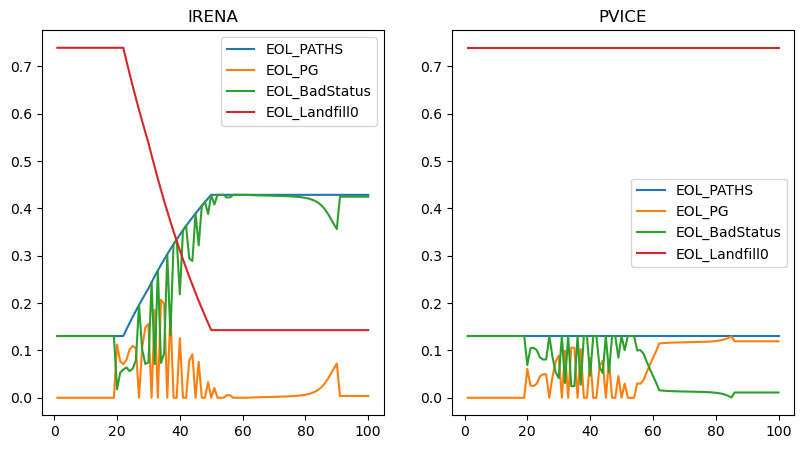

In [34]:
plt.figure(figsize=(15,5))


plt.subplot(1, 3, 2)
plt.plot(PVICE_EOLpaths_norm, label=PVICE_EOLpaths.columns)
plt.legend()
plt.title('PVICE')

plt.subplot(1, 3, 1)
plt.plot(IRENA_EOLpaths_norm, label=IRENA_EOLpaths.columns)
plt.legend()
plt.title('IRENA')



# 2. Remove Trim Years

In [35]:
sim2 = PV_ICE.Simulation(name='sim2', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [36]:
sim2.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [37]:
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim2.createScenario(name='IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim2.scenario['IRENA'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#modified module
moduleinput_m_r_IRENA = os.path.join(altBaselinesfolder, 'mod_r_IRENAregloss.csv')
sim1.createScenario(name='r_IRENA', massmodulefile=moduleinput_m_r_IRENA, energymodulefile=moduleFile_e) 

#modified materials
#glass
matinput_glass_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_glass_improvedRecycle.csv')
matbaseline_e_glass = os.path.join(baselinesfolder,'baseline_material_energy_glass.csv')
sim1.scenario['r_IRENA'].addMaterial('glass', massmatfile=matinput_glass_m_improvedRecycle, energymatfile=matbaseline_e_glass)
#silicon
matinput_silicon_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silicon_improvedRecycle.csv')
matbaseline_e_si = os.path.join(baselinesfolder,'baseline_material_energy_silicon.csv')
sim1.scenario['r_IRENA'].addMaterial('silicon', massmatfile=matinput_silicon_m_improvedRecycle, energymatfile=matbaseline_e_si)
#silver
matinput_silver_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_silver_improvedRecycle.csv')
matbaseline_e_ag = os.path.join(baselinesfolder,'baseline_material_energy_silver.csv')
sim1.scenario['r_IRENA'].addMaterial('silver', massmatfile=matinput_silver_m_improvedRecycle, energymatfile=matbaseline_e_ag)
#aluminium frames
matinput_Al_m_improvedRecycle = os.path.join(altBaselinesfolder,'material_mass_aluminium_frames_improvedRecycle.csv')
matbaseline_e_al = os.path.join(baselinesfolder,'baseline_material_energy_aluminium_frames.csv')
sim1.scenario['r_IRENA'].addMaterial('aluminium_frames', massmatfile=matinput_Al_m_improvedRecycle, energymatfile=matbaseline_e_al)

#standard materials
baselineMats=['copper', 'encapsulant', 'backsheet']
for mats in range (0, len(baselineMats)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+baselineMats[mats]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+baselineMats[mats]+'.csv')
    sim1.scenario['r_IRENA'].addMaterial(baselineMats[mats], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

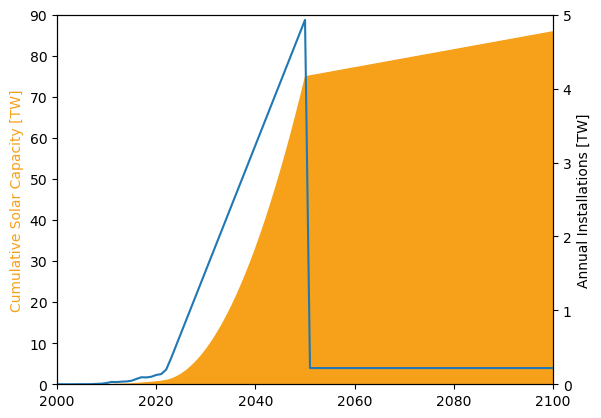

In [38]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [39]:
#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection.loc[:2050,'World_annual_[MWdc]'], start_year=2000)

In [40]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [41]:
sim2.calculateMassFlow() #weibullInputParams=IRENAregloss

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
Working on Scenario:  IRENA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames


In [42]:
sim2.saveSimulation(customname='_debugirena2a')

:) Saved Input and Output Dataframes


In [43]:
ii_yearly2, ii_cumu2 = sim2.aggregateResults() #have to do this to get auto plots

(0.0, 78.75006495310001)

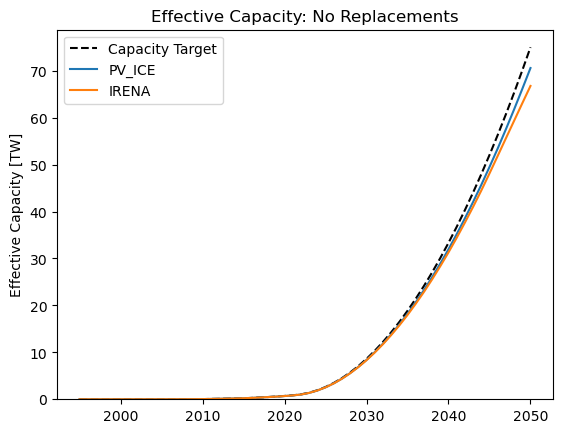

In [44]:
effective_capacity = ii_yearly2.filter(like='ActiveCapacity')
plt.plot(ii_cumu2['newInstalledCapacity_sim2_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim2.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

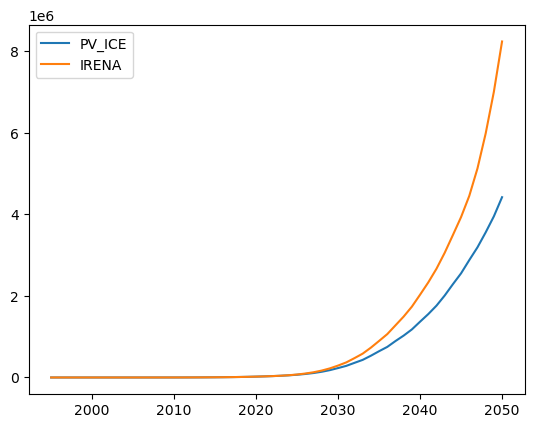

In [45]:
plt.plot(ii_yearly2.filter(like='Decommisioned'))
plt.legend(sim2.scenario.keys())

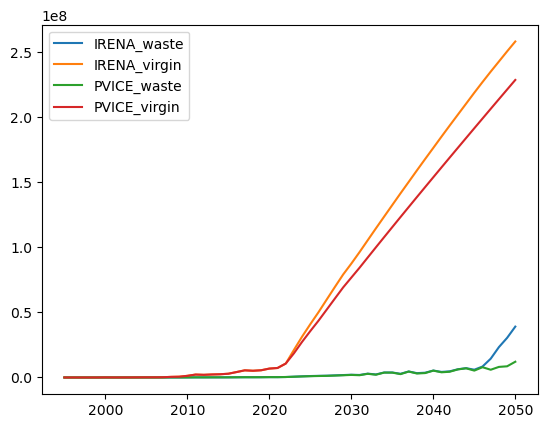

In [46]:
plt.plot(ii_yearly2['WasteAll_Module_sim2_IRENA_[Tonnes]'], label='IRENA_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_IRENA_[Tonnes]'], label='IRENA_virgin')

#plt.plot(ii_yearly2['WasteAll_Module_sim2_r_IRENA_[Tonnes]'], label='r_waste')
#plt.plot(ii_yearly2['VirginStock_Module_sim2_r_IRENA_[Tonnes]'], label='r_virgin')

plt.plot(ii_yearly2['WasteAll_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_virgin')

plt.legend()

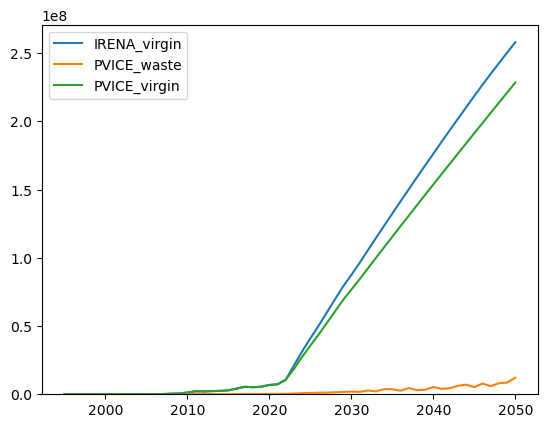

In [47]:
plt.plot(ii_yearly2['VirginStock_Module_sim2_IRENA_[Tonnes]'], label='IRENA_virgin')
plt.plot(ii_yearly2['WasteAll_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly2['VirginStock_Module_sim2_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.ylim(0,)
plt.legend()

(0.0, 467866384.8310476)

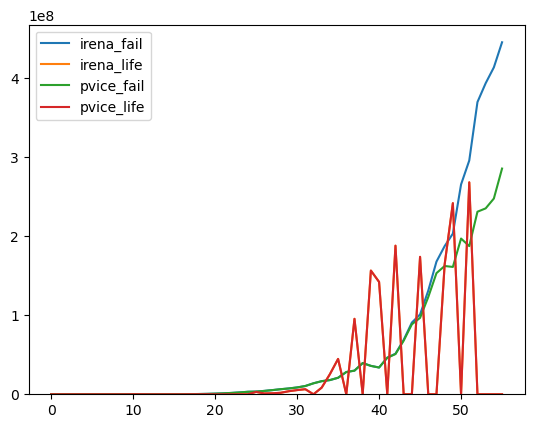

In [48]:
plt.plot(sim2.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='irena_fail')
plt.plot(sim2.scenario['IRENA'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime'], label='irena_life')

#plt.plot(sim2.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_Failure'], label='r_irena_fail')
#plt.plot(sim2.scenario['r_IRENA'].dataOut_m['Yearly_Sum_Area_disposedby_ProjectLifetime'], label='r_irena_life')

plt.plot(sim2.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='pvice_fail')
plt.plot(sim2.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime'], label='pvice_life')
plt.legend()
plt.ylim(0,)

# 3. Check Non IRENA files

In [42]:
sim3 = PV_ICE.Simulation(name='sim3', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\EnergyAnalysis


In [43]:
sim3.createScenario(name='PV_ICE', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['PV_ICE'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [44]:
moduleinput_m_r_PERC = os.path.join(altBaselinesfolder, 'mod_r_50PERC.csv')
sim3.createScenario(name='r_50PERC', massmodulefile=moduleinput_m_r_PERC, energymodulefile=moduleFile_e)
for mat in range (0, len(MATERIALS)):
    matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
    matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
    sim3.scenario['r_50PERC'].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

sim3.modifyScenario('r_PERC', 'mod_lifetime', 30.0, start_year=2022) #changing module 

In [45]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim3.trim_Years(startYear=2000, endYear=2100)

Trimming and extending  PV_ICE
PV_ICE glass : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
PV_ICE aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  r_50PERC
r_50PERC glass : Data trimmed for Energy, years now encompass  2000  to  2100
r_50PERC aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
r_50PERC aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100


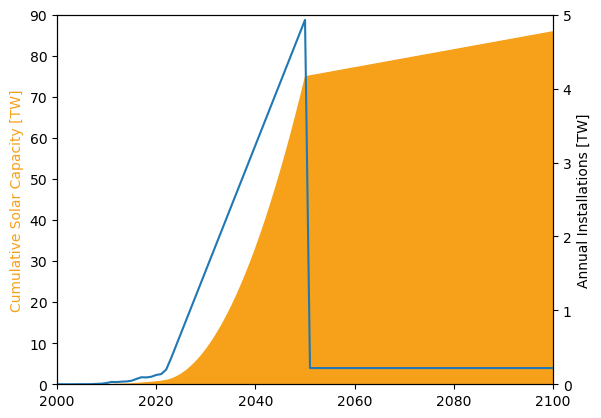

In [46]:
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
fig, ax1 = plt.subplots()

ax1.stackplot(global_projection.index, global_projection['World_cum']/1e6, color='#F7A11A')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='#F7A11A')
ax1.set_ylim(0,90)
ax1.set_xlim(2000,2100)
ax2 = ax1.twinx()
ax2.plot(global_projection['World_annual_[MWdc]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
ax2.set_ylim(0,5)
plt.show()

In [47]:
#deployment projection for all scenarios
sim3.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value= global_projection['World_annual_[MWdc]'], start_year=2000)
#global_projection['World_annual_[MWdc]']

In [48]:
IRENAregloss = {'alpha':5.692,
                   'beta':29.697}

In [49]:
sim3.calculateMassFlow(nameplatedeglimit=0.0) #weibullInputParams=IRENAregloss

>>>> Calculating Material Flows <<<<

Working on Scenario:  PV_ICE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
Working on Scenario:  r_50PERC
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  r_50PERC  =  19410035.81144783  tonnes.


sim3.saveSimulation(customname='_debugirena3')

In [50]:
ii_yearly3, ii_cumu3 = sim3.aggregateResults() #have to do this to get auto plots

(0.0, 90.26425956655)

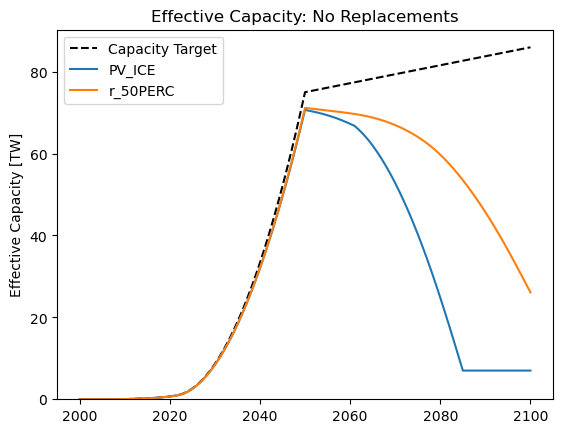

In [51]:
effective_capacity = ii_yearly3.filter(like='ActiveCapacity')
plt.plot(ii_cumu3['newInstalledCapacity_sim3_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity/1e6, label=sim3.scenario.keys())
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

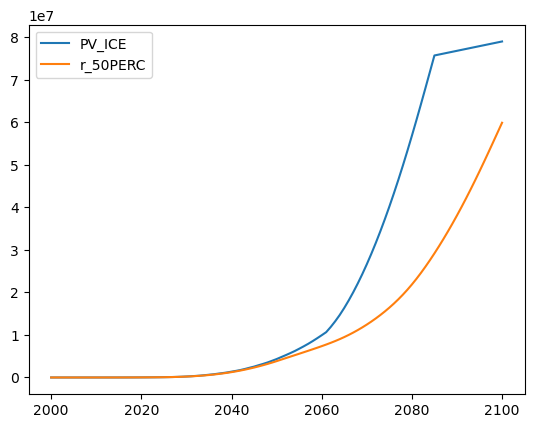

In [52]:
plt.plot(ii_yearly3.filter(like='Decommisioned'))
plt.legend(sim3.scenario.keys())

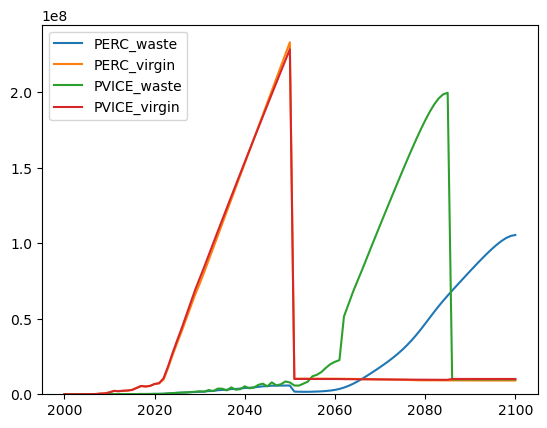

In [53]:


plt.plot(ii_yearly3['WasteAll_Module_sim3_r_50PERC_[Tonnes]'], label='PERC_waste')
plt.plot(ii_yearly3['VirginStock_Module_sim3_r_50PERC_[Tonnes]'], label='PERC_virgin')

plt.plot(ii_yearly3['WasteAll_Module_sim3_PV_ICE_[Tonnes]'], label='PVICE_waste')
plt.plot(ii_yearly3['VirginStock_Module_sim3_PV_ICE_[Tonnes]'], label='PVICE_virgin')
plt.ylim(0,)
plt.legend()

(0.0, 19985401073.3165)

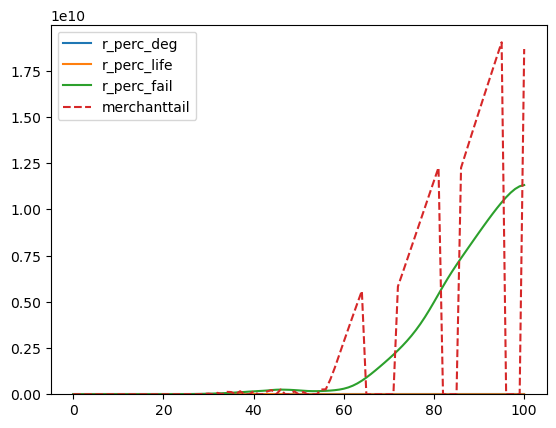

In [54]:

plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_Degradation'], label='r_perc_deg')
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime'], label='r_perc_life')
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='r_perc_fail')

plt.plot(sim3.scenario['r_50PERC'].dataOut_m['MerchantTail_Area'], label='merchanttail', ls='--')


#plt.plot(sim3.scenario['PV_ICE'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='pvice_fail')
#plt.plot(sim3.scenario['r_PERC'].dataIn_m['mod_lifetime']*1e8, label='pvice_life')

plt.legend()
plt.ylim(0,)

In [55]:
sim3.scenario['r_50PERC'].dataOut_m.columns

Index(['Area', 'Cumulative_Active_Area', 'EOL_BadStatus', 'EOL_Landfill0',
       'EOL_PATHS', 'EOL_PG', 'Effective_Capacity_[W]', 'Landfill_0_ProjLife',
       'MerchantTail_Area', 'MerchantTail_[W]', 'ModuleTotal_MFG', 'P2_stored',
       'P3_reMFG', 'P4_recycled', 'PB1_landfill', 'PB2_stored', 'PB3_reMFG',
       'PB3_reMFG_unyield', 'PB3_reMFG_yield', 'PB4_recycled', 'PG1_landfill',
       'PG2_stored', 'PG3_reMFG', 'PG3_reMFG_unyield', 'PG3_reMFG_yield',
       'PG4_recycled', 'Power_Degraded_[W]', 'Repaired_Area', 'Repaired_[W]',
       'Resold_Area', 'Resold_[W]', 'WeibullParams',
       'Yearly_Sum_Area_EOLby_Degradation', 'Yearly_Sum_Area_EOLby_Failure',
       'Yearly_Sum_Area_EOLby_ProjectLifetime', 'Yearly_Sum_Area_PathsBad',
       'Yearly_Sum_Area_PathsGood', 'Yearly_Sum_Area_atEOL',
       'Yearly_Sum_Power_EOLby_Degradation', 'Yearly_Sum_Power_EOLby_Failure',
       'Yearly_Sum_Power_EOLby_ProjectLifetime', 'Yearly_Sum_Power_PathsBad',
       'Yearly_Sum_Power_PathsGood

(0.0, 19985401073.3165)

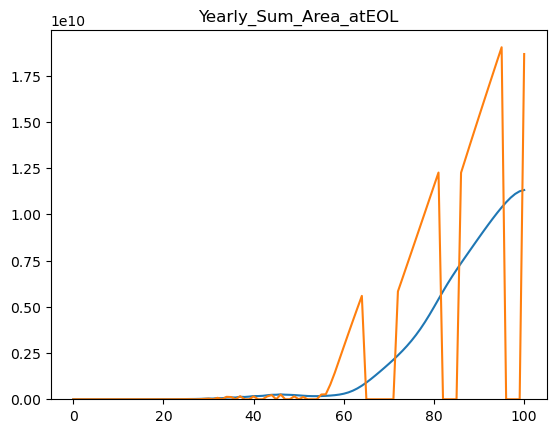

In [56]:
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_atEOL'])
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['MerchantTail_Area'])

plt.title('Yearly_Sum_Area_atEOL')
plt.ylim(0,)

Text(0.5, 1.0, 'Status_BAD_Area')

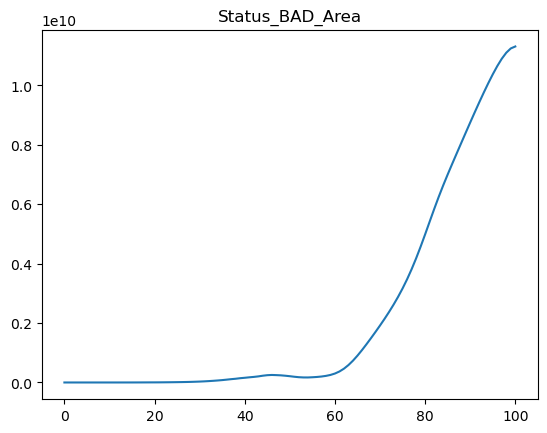

In [57]:
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_PathsBad'])
plt.title('Status_BAD_Area')

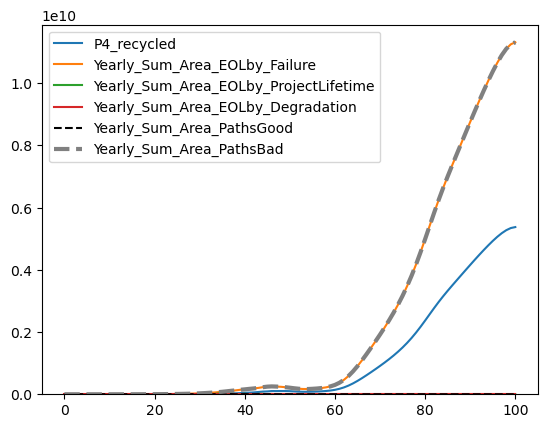

In [58]:
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['P4_recycled'], label = 'P4_recycled')
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'], label='Yearly_Sum_Area_EOLby_Failure')
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime'], label='Yearly_Sum_Area_EOLby_ProjectLifetime')
plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_Degradation'], label='Yearly_Sum_Area_EOLby_Degradation')

plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_PathsGood'], 
         label='Yearly_Sum_Area_PathsGood', ls='--', color='black')

plt.plot(sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_PathsBad'], 
         label='Yearly_Sum_Area_PathsBad', ls='--', color='grey', lw=3)

plt.ylim(0,)
plt.legend(loc='upper left')

In [59]:
kills = pd.concat([sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_Failure'],
           sim3.scenario['r_50PERC'].dataOut_m['Yearly_Sum_Area_EOLby_ProjectLifetime']], axis=1)

In [60]:
kills.tail(30)

,Yearly_Sum_Area_EOLby_Failure,Yearly_Sum_Area_EOLby_ProjectLifetime
71,2.142119e+09,0.0
72,2.374678e+09,0.0
73,2.620232e+09,0.0
74,2.882600e+09,0.0
75,3.166000e+09,0.0
76,3.474563e+09,0.0
77,3.811526e+09,0.0
78,4.178096e+09,0.0
79,4.572170e+09,0.0
80,4.987323e+09,0.0


sim3.saveSimulation(customname='jagged')